In [2]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import os 

# Get the current working directory
main_dir = os.getcwd()
print(main_dir)

# Load your dataset
# this dataset contains is_accepted column (the acceptance of patch which is 0/1)
file_path = os.path.join(main_dir, "dataset_1.csv")
data = pd.read_csv(file_path)


predictors = data.columns

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize only the predictor columns
normalized_data = scaler.fit_transform(data[predictors])

# Convert the normalized array back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=predictors)

# Display the normalized DataFrame
normalized_df.head()


/Users/sarayabesi/Documents/research-poly/eye-tracker-project/machine_learning/dataset_1/clustering_with_acceptance


,fixation_rate_AOI_A1,fixation_rate_AOI_A2,fixation_rate_AOI_A3,fixation_rate_AOI_A4,fixation_rate_AOI_A5,fixation_rate_AOI_A6,avg_fixation_time_AOI_A1,avg_fixation_time_AOI_A2,avg_fixation_time_AOI_A3,avg_fixation_time_AOI_A4,avg_fixation_time_AOI_A5,avg_fixation_time_AOI_A6,is_correct,is_accepted
0,0.849711,0.150831,0.108260,0.0,0.0,0.034682,0.505349,0.278884,0.214655,0.0,0.0,0.038638,0.0,1.0
1,0.572438,0.557835,0.490836,0.0,0.0,0.000000,0.529767,0.435722,0.452538,0.0,0.0,0.000000,1.0,0.0
2,0.924370,0.098674,0.078693,0.0,0.0,0.000000,0.736503,0.421585,0.624924,0.0,0.0,0.000000,1.0,1.0
3,0.822222,0.231944,0.254344,0.0,0.0,0.000000,0.706353,0.268504,0.299868,0.0,0.0,0.000000,1.0,0.0
4,0.816000,0.240062,0.237234,0.0,0.0,0.000000,0.527880,0.417940,0.504866,0.0,0.0,0.000000,1.0,1.0


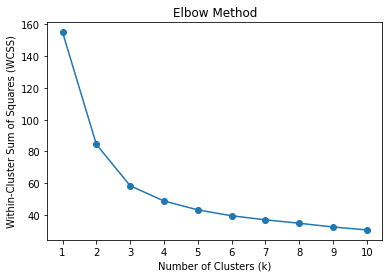

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Initialize an empty list to store the within-cluster sum of squares
wcss = []

# Define the range of k values to try
k_values = range(1, 11)

# Iterate through different values of k
for k in k_values:
    # Initialize KMeans with the current value of k
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit KMeans to the normalized data
    kmeans.fit(normalized_df)
    
    # Append the WCSS to the list
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.xticks(k_values)
plt.show()


In [5]:
# the elbow graph suggest 3 cluster, so we give 3 as the number of cluster to the kmean function

# Initialize KMeans with 3 clusters

kmeans = KMeans(n_clusters=3, random_state=42)

# Fit KMeans to the normalized data
kmeans.fit(normalized_df)

# Add cluster labels to the original DataFrame
data['cluster'] = kmeans.labels_

# Print the count of data points in each cluster
print(data['cluster'].value_counts())

# Display the first few rows of the DataFrame with cluster labels
data.head()


0    107
2     74
1     41
Name: cluster, dtype: int64


,fixation_rate_AOI_A1,fixation_rate_AOI_A2,fixation_rate_AOI_A3,fixation_rate_AOI_A4,fixation_rate_AOI_A5,fixation_rate_AOI_A6,avg_fixation_time_AOI_A1,avg_fixation_time_AOI_A2,avg_fixation_time_AOI_A3,avg_fixation_time_AOI_A4,avg_fixation_time_AOI_A5,avg_fixation_time_AOI_A6,is_correct,is_accepted,cluster
0,0.849711,0.115607,0.069364,0.0,0.0,0.034682,628.666667,567.800000,412.416667,0.0,0.0,243.166667,0,1,2
1,0.572438,0.427562,0.314488,0.0,0.0,0.000000,659.043210,887.115702,869.460674,0.0,0.0,0.000000,1,0,1
2,0.924370,0.075630,0.050420,0.0,0.0,0.000000,916.227273,858.333333,1200.666667,0.0,0.0,0.000000,1,1,0
3,0.822222,0.177778,0.162963,0.0,0.0,0.000000,878.720721,546.666667,576.136364,0.0,0.0,0.000000,1,0,1
4,0.816000,0.184000,0.152000,0.0,0.0,0.000000,656.696078,850.913043,970.000000,0.0,0.0,0.000000,1,1,0


In [19]:
# Define the file path for saving
clustering_csv_path = os.path.join(main_dir, "clustering_with_acceptance.csv")

# Save DataFrame to Excel
data.to_csv(clustering_csv_path, index=False)

print("DataFrame successfully converted to CSV file at:", clustering_csv_path)

DataFrame successfully converted to CSV file at: /Users/sarayabesi/Documents/research-poly/eye-tracker-project/machine_learning/dataset_1/clustering_with_acceptance/clustering_with_acceptance.csv


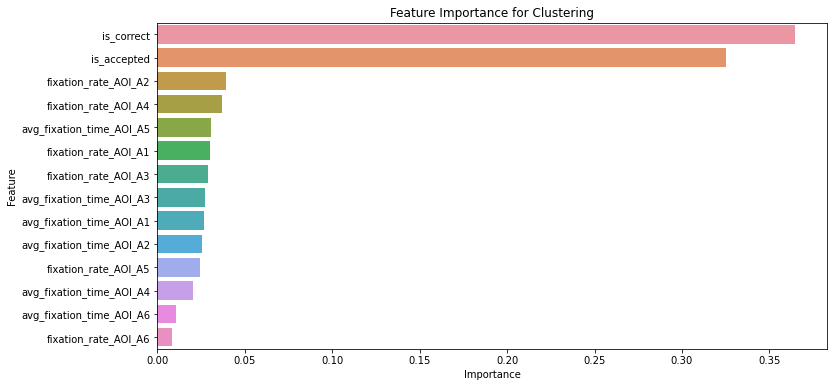

In [6]:
# graph for feature importance in clustering

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and 'cluster' is the target variable
X = data.drop(columns=['cluster'])
y = data['cluster']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Clustering')
plt.show()

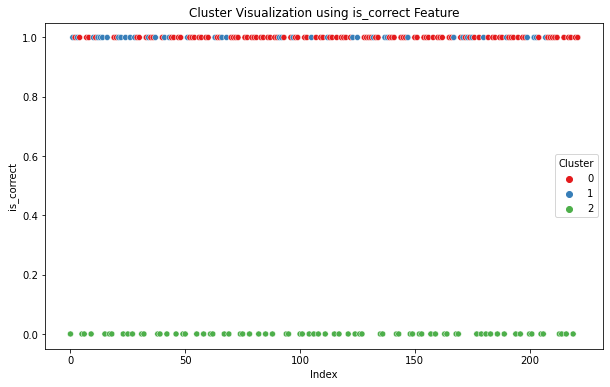

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `data` is your DataFrame and it includes columns 'is_correct' and 'cluster'
# Replace 'is_correct' and 'cluster' with the actual column names in your dataset if they are different

# Sample DataFrame for illustration purposes (remove if you already have `data`)
# data = pd.DataFrame({
#     'is_correct': [0, 1, 0, 1, 1, 0],
#     'cluster': [0, 0, 1, 1, 0, 1]
# })

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data.index, y='is_correct', hue='cluster', palette='Set1', data=data)
plt.title('Cluster Visualization using is_correct Feature')
plt.xlabel('Index')
plt.ylabel('is_correct')
plt.legend(title='Cluster')
plt.show()


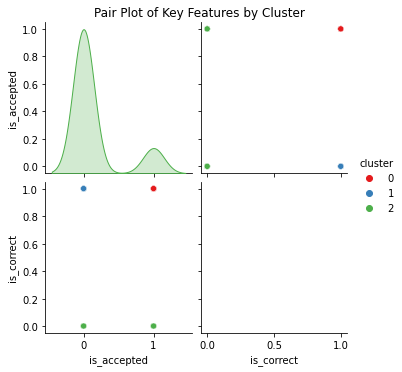

In [24]:
# Pair Plot between is_corrected, is_accepted and clusters(0,1,2)

sns.pairplot(data, hue='cluster', palette='Set1', vars=['is_accepted' ,'is_correct'])
plt.suptitle('Pair Plot of Key Features by Cluster', y=1.02)
plt.show()

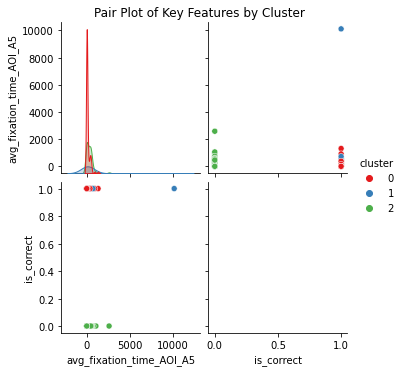

In [8]:
# Pair Plot between is_corrected, is_accepted and clusters(0,1,2)

sns.pairplot(data, hue='cluster', palette='Set1', vars=['avg_fixation_time_AOI_A5' ,'is_correct'])
plt.suptitle('Pair Plot of Key Features by Cluster', y=1.02)
plt.show()

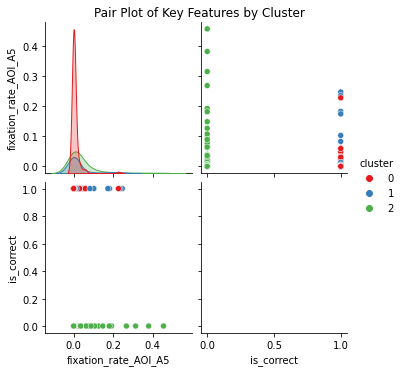

In [10]:
# Pair Plot between is_corrected, is_accepted and clusters(0,1,2)

sns.pairplot(data, hue='cluster', palette='Set1', vars=['fixation_rate_AOI_A5' ,'is_correct'])
plt.suptitle('Pair Plot of Key Features by Cluster', y=1.02)
plt.show()

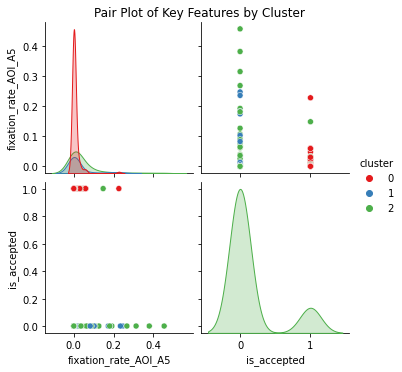

In [13]:
# Pair Plot between is_corrected, is_accepted and clusters(0,1,2)

sns.pairplot(data, hue='cluster', palette='Set1', vars=['fixation_rate_AOI_A5' ,'is_accepted'])
plt.suptitle('Pair Plot of Key Features by Cluster', y=1.02)
plt.show()

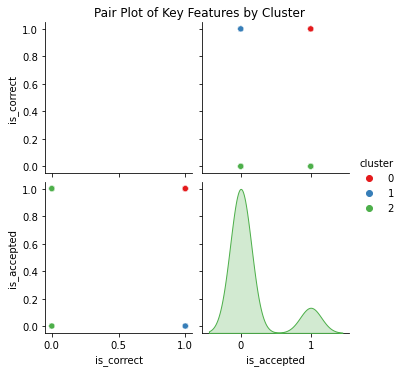

In [12]:
# Pair Plot between is_corrected, is_accepted and clusters(0,1,2)

sns.pairplot(data, hue='cluster', palette='Set1', vars=['avg_fixation_time_AOI_A5' ,'is_accepted'])
plt.suptitle('Pair Plot of Key Features by Cluster', y=1.02)
plt.show()

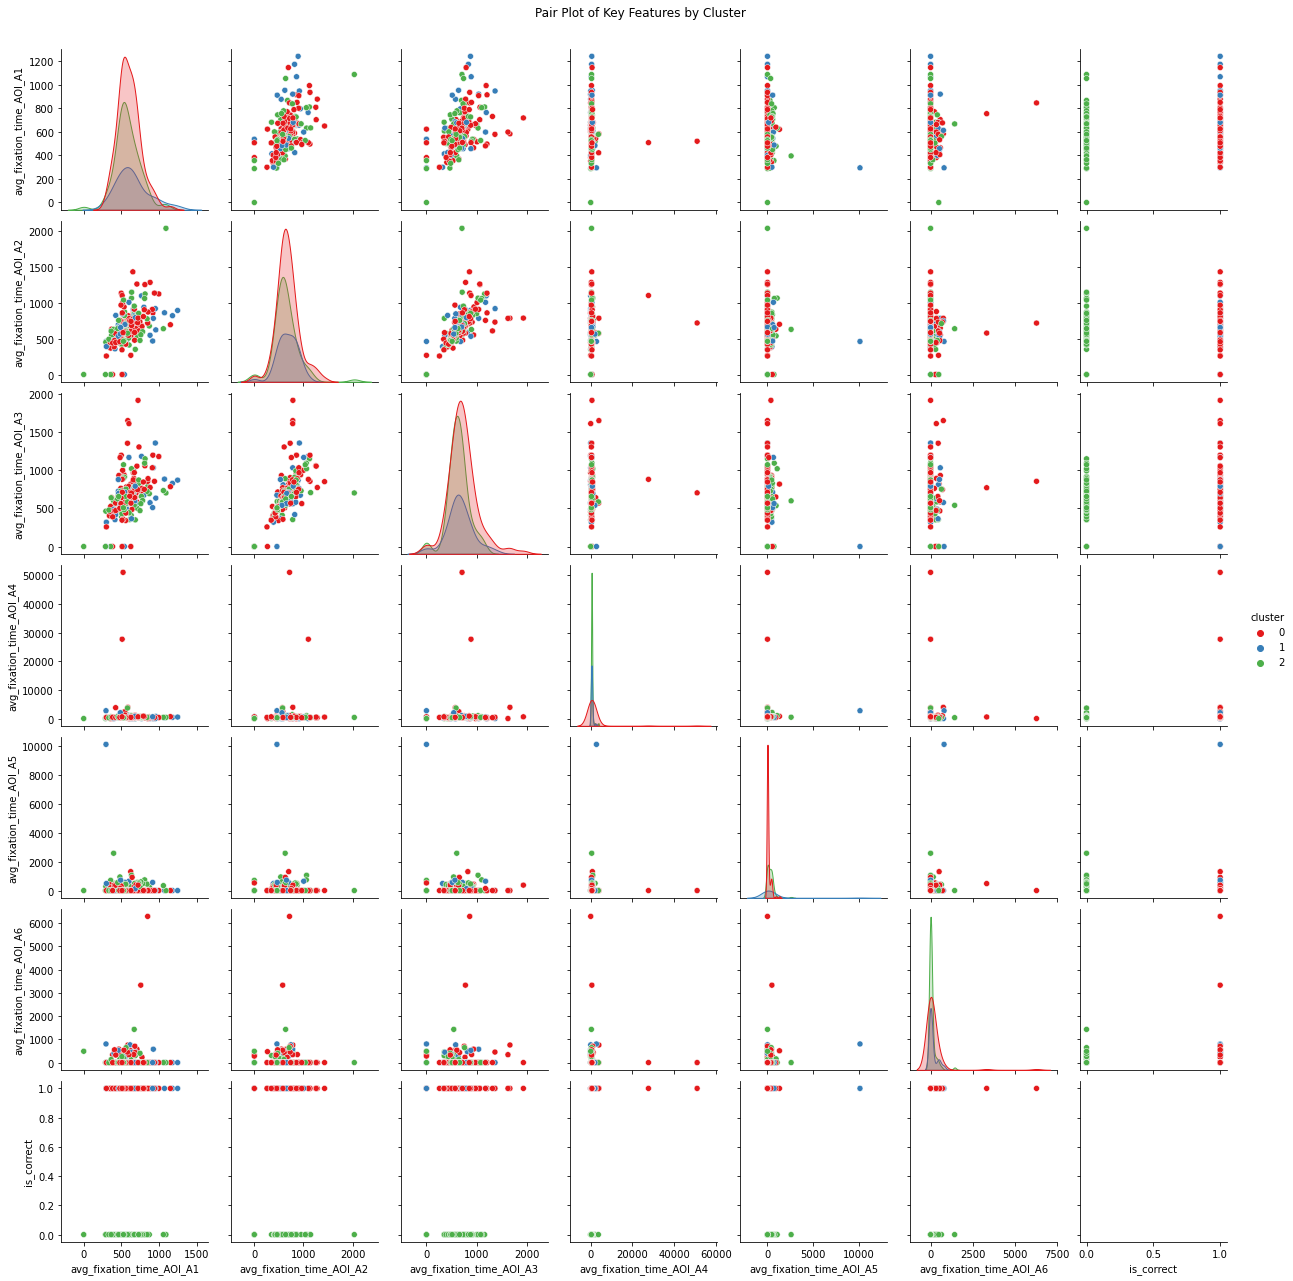

In [23]:
# Pair Plot between is_corrected, avg. fixation time on 6 AOIs and clusters(0,1,2)

sns.pairplot(data, hue='cluster', palette='Set1', vars=['avg_fixation_time_AOI_A1', 'avg_fixation_time_AOI_A2', 'avg_fixation_time_AOI_A3', 'avg_fixation_time_AOI_A4', 'avg_fixation_time_AOI_A5', 'avg_fixation_time_AOI_A6','is_correct'])
plt.suptitle('Pair Plot of Key Features by Cluster', y=1.02)
plt.show()
